In [1]:
#聚类
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
from sklearn import datasets, linear_model
import sklearn
from sklearn.linear_model import LogisticRegressionCV,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
import matplotlib as mpl

In [2]:
data = pd.read_csv('iBeacon_RSSI_Unlabeled.csv')

In [3]:
data = data.drop('date', 1)
data = data.drop('location', 1)
data.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [4]:
X = data[['b3001','b3002','b3003','b3004','b3005','b3006','b3007','b3008','b3009','b3010','b3011','b3012','b3013']]
X.shape

(5191, 13)

In [5]:
#1/DBScan
from sklearn.cluster import DBSCAN
import numpy as np
clustering = DBSCAN(eps=0.5, min_samples=3).fit(X)
clustering.labels_

array([ -1,  -1,  -1, ..., 129, 129, 129])

In [6]:
clustering 

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=3, n_jobs=1, p=None)

In [7]:
X.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [8]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_embedded = tsne.fit_transform(X)
print(tsne.embedding_)

[[-26.730349   16.443289 ]
 [-20.419756   10.657932 ]
 [-20.292774   11.319039 ]
 ...
 [  3.3878913 -84.57292  ]
 [  3.423903  -84.93217  ]
 [  3.3878913 -84.57292  ]]


In [9]:
X_embedded.shape

(5191, 2)

In [10]:
clustering.labels_

array([ -1,  -1,  -1, ..., 129, 129, 129])

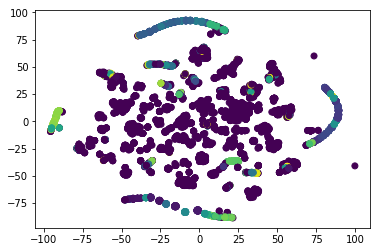

In [11]:
from pylab import *
scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)
show()

In [12]:
#2/KMeans
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
kmeans.labels_
kmeans.predict(X)
kmeans.cluster_centers_

array([[-166.44746717, -130.95403377, -193.46998124, -197.04221388,
         -84.32457786, -156.44183865, -197.2879925 , -106.39118199,
        -198.42307692, -184.30487805, -190.27861163, -198.2260788 ,
        -199.90243902],
       [ -80.90750436, -198.22164049, -198.7556719 , -199.79057592,
        -190.92844677, -189.91797557, -199.60383944, -187.0034904 ,
        -174.93193717, -198.0017452 , -198.89528796, -200.        ,
        -199.82722513],
       [-198.55683269,  -89.40102171, -107.67688378, -159.00893997,
        -128.55172414, -123.49297573, -196.11366539, -183.81864623,
        -200.        , -198.74712644, -199.39463602, -200.        ,
        -200.        ],
       [-199.77883008, -194.93649025, -198.31253482, -191.41281337,
        -197.91476323, -197.67632312, -199.83844011, -184.79331476,
        -163.75376045, -169.83286908, -171.65905292, -172.4367688 ,
        -166.09860724],
       [-197.70225873, -194.8963039 , -184.59753593, -164.81314168,
        -169.6416837

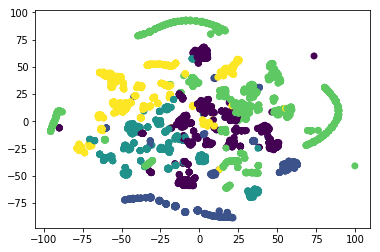

In [13]:
from pylab import *
scatter(X_embedded[:,0],X_embedded[:,1],c=kmeans.labels_)
show()

In [14]:
#3/GMM
from sklearn import mixture
import numpy as np
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full')
gmm.fit(X)
F = gmm.predict(X)

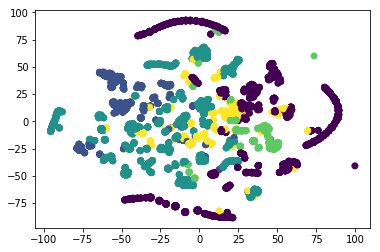

In [15]:
from pylab import *
scatter(X_embedded[:,0],X_embedded[:,1],c=F)
show()

In [16]:
#4/层次聚类
from sklearn.cluster import AgglomerativeClustering
import numpy as np
clustering = AgglomerativeClustering(n_clusters= 5).fit(X)

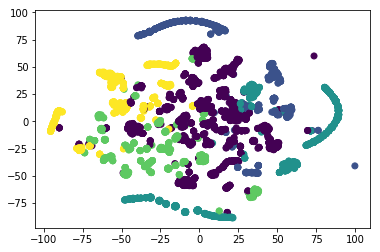

In [17]:
from pylab import *
scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)
show()

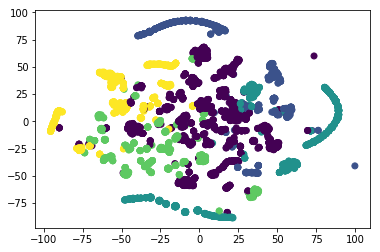

In [18]:
from pylab import *
scatter(X_embedded[:,0],X_embedded[:,1],c=clustering.labels_)
show()